# Bridge-T
Last update: 12 Feb 2024  

![Bridge T](Bridge-T.png){#fig-bridge-t}  

## Introduction

$\large{\color {red} {\text{add a comment about SMNA being fundamentaly frequency domain analysis}}}$  

[electronics stackexchange](https://electronics.stackexchange.com/)

A question posted on Electronics Stackexchange by @lees2023 asked: 

>I'm trying to figure out how to formulate and solve some differential equations for this circuit.

@fig-bridge-t

Initial conditions with voltages on the capacitors, leading to the situation of voltage capacitor loop where V1 does not equal sum of initial capacitor voltages.

- why this circuit?
- put initial conditions in paralell with elements
- solve for initial conditions with some element values
- need to get LTSpice transient simulation working and compare to Python analysis - 

$\large{\color {red} {\text{Python analysis for v2 is wrong, steady state should be 1 volt, instead it is zero}}}$  

- after some experiementing, in LTSpice if C3 ic=-1, then results agree with Python.
- Strainge that flipping orientation of V4 causes the solution to be 1. Need an explination.

## Circuit description
no component values were given

## Circuit analysis

- Solve the equations for initial conditions on the caps
- find the state equations
- what does the analysi to the node voltages to be at t(0+) and does this make sense?

Frequency domain equivilent of C with an initial voltage condition is a series voltage source v(0-)/s 



![Bridge Ta](Bridge-Ta.png){#fig-bridge-ta} 

rotated V4

explain why rotating V4 gives different results 

The net list for the filter is:
```
V1 1 0 1
C2 4 1 1
C3 5 2 1
C1 6 2 1
L1 1 2 1 Rser=0
R1 3 0 1
V2 4 3 1
V3 6 0 1
V4 5 3 1



* C:\users\jeff64\My Documents\Bridge-T\Bridge-Ta.asc
V1 1 0 1
C2 4 1 1
C3 5 2 1
C1 6 2 1
L1 1 2 1 Rser=0
R1 3 0 1
V2 4 3 1
V3 6 0 1
V4 3 5 1
.op
.backanno
.end

```

The following Python modules are used.

In [1]:
from sympy import *
import numpy as np
from tabulate import tabulate
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

In [2]:
t = symbols('t',positive=True)  # t > 0

### Load the netlist
The netlist generated by LTSpice is pasted into the cell below and some edits were made to remove the inductor series resistance and the independent sources are set to their DC values.

In [3]:
net_list = '''
V1 1 0 1
C2 4 1 1
C3 5 2 1
C1 6 2 1
L1 1 2 1
R1 3 0 1
V2 4 3 1
V3 6 0 1
V4 3 5 1
'''

Generate the network equations.

In [4]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [5]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$C_{2} s v_{1} - C_{2} s v_{4} + I_{L1} + I_{V1} = 0$<br>$- C_{1} s v_{6} - C_{3} s v_{5} - I_{L1} + v_{2} \left(C_{1} s + C_{3} s\right) = 0$<br>$- I_{V2} + I_{V4} + \frac{v_{3}}{R_{1}} = 0$<br>$- C_{2} s v_{1} + C_{2} s v_{4} + I_{V2} = 0$<br>$- C_{3} s v_{2} + C_{3} s v_{5} - I_{V4} = 0$<br>$- C_{1} s v_{2} + C_{1} s v_{6} + I_{V3} = 0$<br>$v_{1} = V_{1}$<br>$- v_{3} + v_{4} = V_{2}$<br>$v_{6} = V_{3}$<br>$v_{3} - v_{5} = V_{4}$<br>$- I_{L1} L_{1} s + v_{1} - v_{2} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displace in matrix notation.

In [6]:
NE_sym

⎡      C₂⋅s⋅v₁ - C₂⋅s⋅v₄ + I_L1 + I_V1       ⎤       
⎢                                            ⎥   ⎡0 ⎤
⎢-C₁⋅s⋅v₆ - C₃⋅s⋅v₅ - I_L1 + v₂⋅(C₁⋅s + C₃⋅s)⎥   ⎢  ⎥
⎢                                            ⎥   ⎢0 ⎥
⎢                            v₃              ⎥   ⎢  ⎥
⎢             -I_V2 + I_V4 + ──              ⎥   ⎢0 ⎥
⎢                            R₁              ⎥   ⎢  ⎥
⎢                                            ⎥   ⎢0 ⎥
⎢         -C₂⋅s⋅v₁ + C₂⋅s⋅v₄ + I_V2          ⎥   ⎢  ⎥
⎢                                            ⎥   ⎢0 ⎥
⎢         -C₃⋅s⋅v₂ + C₃⋅s⋅v₅ - I_V4          ⎥   ⎢  ⎥
⎢                                            ⎥ = ⎢0 ⎥
⎢         -C₁⋅s⋅v₂ + C₁⋅s⋅v₆ + I_V3          ⎥   ⎢  ⎥
⎢                                            ⎥   ⎢V₁⎥
⎢                     v₁                     ⎥   ⎢  ⎥
⎢                                            ⎥   ⎢V₂⎥
⎢                  -v₃ + v₄                  ⎥   ⎢  ⎥
⎢                                            ⎥   ⎢V₃⎥
⎢                     v₆    

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [7]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Set initial conditions for C1, C2 and C3 by appling Heaveside to V2, V3 and V4 

In [8]:
NE_sym_ic = NE_sym.subs({V1:laplace_transform(V1*Heaviside(t), t, s)[0], V2:laplace_transform(V2*Heaviside(t), t, s)[0], V3:laplace_transform(V3*Heaviside(t), t, s)[0], V4:laplace_transform(V4*Heaviside(t), t, s)[0]})

In [9]:
NE_sym_ic

                                                 ⎡0 ⎤
                                                 ⎢  ⎥
                                                 ⎢0 ⎥
⎡      C₂⋅s⋅v₁ - C₂⋅s⋅v₄ + I_L1 + I_V1       ⎤   ⎢  ⎥
⎢                                            ⎥   ⎢0 ⎥
⎢-C₁⋅s⋅v₆ - C₃⋅s⋅v₅ - I_L1 + v₂⋅(C₁⋅s + C₃⋅s)⎥   ⎢  ⎥
⎢                                            ⎥   ⎢0 ⎥
⎢                            v₃              ⎥   ⎢  ⎥
⎢             -I_V2 + I_V4 + ──              ⎥   ⎢0 ⎥
⎢                            R₁              ⎥   ⎢  ⎥
⎢                                            ⎥   ⎢0 ⎥
⎢         -C₂⋅s⋅v₁ + C₂⋅s⋅v₄ + I_V2          ⎥   ⎢  ⎥
⎢                                            ⎥   ⎢V₁⎥
⎢         -C₃⋅s⋅v₂ + C₃⋅s⋅v₅ - I_V4          ⎥   ⎢──⎥
⎢                                            ⎥ = ⎢s ⎥
⎢         -C₁⋅s⋅v₂ + C₁⋅s⋅v₆ + I_V3          ⎥   ⎢  ⎥
⎢                                            ⎥   ⎢V₂⎥
⎢                     v₁                     ⎥   ⎢──⎥
⎢                           

Generate the symbolic solution

In [10]:
U_sym_ic = solve(NE_sym_ic,X)

Display the symbolic solution

In [11]:
temp = ''
for i in U_sym_ic.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym_ic[i]))

Markdown(temp)

$v_{1} = \frac{V_{1}}{s}$<br>$v_{2} = \frac{C_{1} C_{2} L_{1} R_{1} V_{3} s^{3} + C_{1} C_{3} L_{1} R_{1} V_{3} s^{3} + C_{1} L_{1} V_{3} s^{2} + C_{2} C_{3} L_{1} R_{1} V_{1} s^{3} - C_{2} C_{3} L_{1} R_{1} V_{2} s^{3} - C_{2} C_{3} L_{1} R_{1} V_{4} s^{3} + C_{2} R_{1} V_{1} s - C_{3} L_{1} V_{4} s^{2} + C_{3} R_{1} V_{1} s + V_{1}}{C_{1} C_{2} L_{1} R_{1} s^{4} + C_{1} C_{3} L_{1} R_{1} s^{4} + C_{1} L_{1} s^{3} + C_{2} C_{3} L_{1} R_{1} s^{4} + C_{2} R_{1} s^{2} + C_{3} L_{1} s^{3} + C_{3} R_{1} s^{2} + s}$<br>$v_{3} = \frac{C_{1} C_{2} L_{1} R_{1} V_{1} s^{2} - C_{1} C_{2} L_{1} R_{1} V_{2} s^{2} + C_{1} C_{3} L_{1} R_{1} V_{3} s^{2} + C_{1} C_{3} L_{1} R_{1} V_{4} s^{2} + C_{2} C_{3} L_{1} R_{1} V_{1} s^{2} - C_{2} C_{3} L_{1} R_{1} V_{2} s^{2} + C_{2} R_{1} V_{1} - C_{2} R_{1} V_{2} + C_{3} R_{1} V_{1} + C_{3} R_{1} V_{4}}{C_{1} C_{2} L_{1} R_{1} s^{3} + C_{1} C_{3} L_{1} R_{1} s^{3} + C_{1} L_{1} s^{2} + C_{2} C_{3} L_{1} R_{1} s^{3} + C_{2} R_{1} s + C_{3} L_{1} s^{2} + C_{3} R_{1} s + 1}$<br>$v_{4} = \frac{C_{1} C_{2} L_{1} R_{1} V_{1} s^{3} + C_{1} C_{3} L_{1} R_{1} V_{2} s^{3} + C_{1} C_{3} L_{1} R_{1} V_{3} s^{3} + C_{1} C_{3} L_{1} R_{1} V_{4} s^{3} + C_{1} L_{1} V_{2} s^{2} + C_{2} C_{3} L_{1} R_{1} V_{1} s^{3} + C_{2} R_{1} V_{1} s + C_{3} L_{1} V_{2} s^{2} + C_{3} R_{1} V_{1} s + C_{3} R_{1} V_{2} s + C_{3} R_{1} V_{4} s + V_{2}}{C_{1} C_{2} L_{1} R_{1} s^{4} + C_{1} C_{3} L_{1} R_{1} s^{4} + C_{1} L_{1} s^{3} + C_{2} C_{3} L_{1} R_{1} s^{4} + C_{2} R_{1} s^{2} + C_{3} L_{1} s^{3} + C_{3} R_{1} s^{2} + s}$<br>$v_{5} = \frac{C_{1} C_{2} L_{1} R_{1} V_{1} s^{3} - C_{1} C_{2} L_{1} R_{1} V_{2} s^{3} - C_{1} C_{2} L_{1} R_{1} V_{4} s^{3} + C_{1} C_{3} L_{1} R_{1} V_{3} s^{3} - C_{1} L_{1} V_{4} s^{2} + C_{2} C_{3} L_{1} R_{1} V_{1} s^{3} - C_{2} C_{3} L_{1} R_{1} V_{2} s^{3} - C_{2} C_{3} L_{1} R_{1} V_{4} s^{3} + C_{2} R_{1} V_{1} s - C_{2} R_{1} V_{2} s - C_{2} R_{1} V_{4} s - C_{3} L_{1} V_{4} s^{2} + C_{3} R_{1} V_{1} s - V_{4}}{C_{1} C_{2} L_{1} R_{1} s^{4} + C_{1} C_{3} L_{1} R_{1} s^{4} + C_{1} L_{1} s^{3} + C_{2} C_{3} L_{1} R_{1} s^{4} + C_{2} R_{1} s^{2} + C_{3} L_{1} s^{3} + C_{3} R_{1} s^{2} + s}$<br>$v_{6} = \frac{V_{3}}{s}$<br>$I_{V1} = \frac{- C_{1} C_{2} C_{3} L_{1} R_{1} V_{1} s^{3} + C_{1} C_{2} C_{3} L_{1} R_{1} V_{2} s^{3} + C_{1} C_{2} C_{3} L_{1} R_{1} V_{3} s^{3} + C_{1} C_{2} C_{3} L_{1} R_{1} V_{4} s^{3} - C_{1} C_{2} L_{1} V_{1} s^{2} + C_{1} C_{2} L_{1} V_{2} s^{2} - C_{1} C_{2} R_{1} V_{1} s + C_{1} C_{2} R_{1} V_{3} s - C_{1} C_{3} R_{1} V_{1} s + C_{1} C_{3} R_{1} V_{3} s - C_{1} V_{1} + C_{1} V_{3} - C_{2} C_{3} L_{1} V_{1} s^{2} + C_{2} C_{3} L_{1} V_{2} s^{2} - C_{2} V_{1} + C_{2} V_{2} - C_{3} V_{1} - C_{3} V_{4}}{C_{1} C_{2} L_{1} R_{1} s^{3} + C_{1} C_{3} L_{1} R_{1} s^{3} + C_{1} L_{1} s^{2} + C_{2} C_{3} L_{1} R_{1} s^{3} + C_{2} R_{1} s + C_{3} L_{1} s^{2} + C_{3} R_{1} s + 1}$<br>$I_{V2} = \frac{C_{1} C_{2} C_{3} L_{1} R_{1} V_{1} s^{3} - C_{1} C_{2} C_{3} L_{1} R_{1} V_{2} s^{3} - C_{1} C_{2} C_{3} L_{1} R_{1} V_{3} s^{3} - C_{1} C_{2} C_{3} L_{1} R_{1} V_{4} s^{3} + C_{1} C_{2} L_{1} V_{1} s^{2} - C_{1} C_{2} L_{1} V_{2} s^{2} + C_{2} C_{3} L_{1} V_{1} s^{2} - C_{2} C_{3} L_{1} V_{2} s^{2} - C_{2} C_{3} R_{1} V_{2} s - C_{2} C_{3} R_{1} V_{4} s + C_{2} V_{1} - C_{2} V_{2}}{C_{1} C_{2} L_{1} R_{1} s^{3} + C_{1} C_{3} L_{1} R_{1} s^{3} + C_{1} L_{1} s^{2} + C_{2} C_{3} L_{1} R_{1} s^{3} + C_{2} R_{1} s + C_{3} L_{1} s^{2} + C_{3} R_{1} s + 1}$<br>$I_{V3} = \frac{C_{1} C_{2} C_{3} L_{1} R_{1} V_{1} s^{3} - C_{1} C_{2} C_{3} L_{1} R_{1} V_{2} s^{3} - C_{1} C_{2} C_{3} L_{1} R_{1} V_{3} s^{3} - C_{1} C_{2} C_{3} L_{1} R_{1} V_{4} s^{3} + C_{1} C_{2} R_{1} V_{1} s - C_{1} C_{2} R_{1} V_{3} s - C_{1} C_{3} L_{1} V_{3} s^{2} - C_{1} C_{3} L_{1} V_{4} s^{2} + C_{1} C_{3} R_{1} V_{1} s - C_{1} C_{3} R_{1} V_{3} s + C_{1} V_{1} - C_{1} V_{3}}{C_{1} C_{2} L_{1} R_{1} s^{3} + C_{1} C_{3} L_{1} R_{1} s^{3} + C_{1} L_{1} s^{2} + C_{2} C_{3} L_{1} R_{1} s^{3} + C_{2} R_{1} s + C_{3} L_{1} s^{2} + C_{3} R_{1} s + 1}$<br>$I_{V4} = \frac{C_{1} C_{2} C_{3} L_{1} R_{1} V_{1} s^{3} - C_{1} C_{2} C_{3} L_{1} R_{1} V_{2} s^{3} - C_{1} C_{2} C_{3} L_{1} R_{1} V_{3} s^{3} - C_{1} C_{2} C_{3} L_{1} R_{1} V_{4} s^{3} - C_{1} C_{3} L_{1} V_{3} s^{2} - C_{1} C_{3} L_{1} V_{4} s^{2} - C_{2} C_{3} R_{1} V_{2} s - C_{2} C_{3} R_{1} V_{4} s - C_{3} V_{1} - C_{3} V_{4}}{C_{1} C_{2} L_{1} R_{1} s^{3} + C_{1} C_{3} L_{1} R_{1} s^{3} + C_{1} L_{1} s^{2} + C_{2} C_{3} L_{1} R_{1} s^{3} + C_{2} R_{1} s + C_{3} L_{1} s^{2} + C_{3} R_{1} s + 1}$<br>$I_{L1} = \frac{C_{1} C_{2} R_{1} V_{1} s - C_{1} C_{2} R_{1} V_{3} s + C_{1} C_{3} R_{1} V_{1} s - C_{1} C_{3} R_{1} V_{3} s + C_{1} V_{1} - C_{1} V_{3} + C_{2} C_{3} R_{1} V_{2} s + C_{2} C_{3} R_{1} V_{4} s + C_{3} V_{1} + C_{3} V_{4}}{C_{1} C_{2} L_{1} R_{1} s^{3} + C_{1} C_{3} L_{1} R_{1} s^{3} + C_{1} L_{1} s^{2} + C_{2} C_{3} L_{1} R_{1} s^{3} + C_{2} R_{1} s + C_{3} L_{1} s^{2} + C_{3} R_{1} s + 1}$<br>

Get element values from network dataframe.

## Initial conditions with values
The SymPy Heaviside function is used to define the initial current and voltage on the inductor and capacitor.  

The equivalent circuit in s domain has a capacitor C with impedance 1/(sC) and a voltage source v(0)/s in series.

In [12]:
element_values = SymMNA.get_part_values(network_df)
element_values

In [13]:
element_values[V1] = laplace_transform(element_values[V1]*Heaviside(t), t, s)[0]
element_values[V2] = laplace_transform(element_values[V2]*Heaviside(t), t, s)[0]
element_values[V3] = laplace_transform(element_values[V3]*Heaviside(t), t, s)[0]
element_values[V4] = laplace_transform(element_values[V4]*Heaviside(t), t, s)[0]

In [14]:
element_values

In [15]:
NE_ic = NE_sym.subs(element_values)
NE_ic

                                   ⎡ 0 ⎤
                                   ⎢   ⎥
                                   ⎢ 0 ⎥
                                   ⎢   ⎥
⎡I_L1 + I_V1 + 1.0⋅s⋅v₁ - s⋅v₄ ⎤   ⎢ 0 ⎥
⎢                              ⎥   ⎢   ⎥
⎢-I_L1 + 2.0⋅s⋅v₂ - s⋅v₅ - s⋅v₆⎥   ⎢ 0 ⎥
⎢                              ⎥   ⎢   ⎥
⎢    -I_V2 + I_V4 + 1.0⋅v₃     ⎥   ⎢ 0 ⎥
⎢                              ⎥   ⎢   ⎥
⎢    I_V2 - s⋅v₁ + 1.0⋅s⋅v₄    ⎥   ⎢ 0 ⎥
⎢                              ⎥   ⎢   ⎥
⎢   -I_V4 - s⋅v₂ + 1.0⋅s⋅v₅    ⎥   ⎢1.0⎥
⎢                              ⎥   ⎢───⎥
⎢    I_V3 - s⋅v₂ + 1.0⋅s⋅v₆    ⎥ = ⎢ s ⎥
⎢                              ⎥   ⎢   ⎥
⎢              v₁              ⎥   ⎢1.0⎥
⎢                              ⎥   ⎢───⎥
⎢           -v₃ + v₄           ⎥   ⎢ s ⎥
⎢                              ⎥   ⎢   ⎥
⎢              v₆              ⎥   ⎢1.0⎥
⎢                              ⎥   ⎢───⎥
⎢           v₃ - v₅            ⎥   ⎢ s ⎥
⎢                              ⎥   ⎢   ⎥
⎣      -I_L1⋅s +

Solve the network equations and display the results.

In [51]:
U_ic = solve(NE_ic,X)

temp = ''
for i in U_ic.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_ic[i]))

Markdown(temp)

$v_{1} = \frac{1}{s}$<br>$v_{2} = \frac{s^{3} + 2.0 s + 1.0}{3.0 s^{4} + 2.0 s^{3} + 2.0 s^{2} + s}$<br>$v_{3} = \frac{2.0 s^{2} + 2.0}{3.0 s^{3} + 2.0 s^{2} + 2.0 s + 1.0}$<br>$v_{4} = \frac{5.0 s^{3} + 2.0 s^{2} + 4.0 s + 1.0}{3.0 s^{4} + 2.0 s^{3} + 2.0 s^{2} + s}$<br>$v_{5} = \frac{- s^{3} - 2.0 s^{2} - 1.0}{3.0 s^{4} + 2.0 s^{3} + 2.0 s^{2} + s}$<br>$v_{6} = \frac{1}{s}$<br>$I_{V1} = \frac{2.0 s^{3} - 2.0}{3.0 s^{3} + 2.0 s^{2} + 2.0 s + 1.0}$<br>$I_{V2} = \frac{- 2.0 s^{3} - 2.0 s}{3.0 s^{3} + 2.0 s^{2} + 2.0 s + 1.0}$<br>$I_{V3} = \frac{- 2.0 s^{3} - 2.0 s^{2}}{3.0 s^{3} + 2.0 s^{2} + 2.0 s + 1.0}$<br>$I_{V4} = \frac{- 2.0 s^{3} - 2.0 s^{2} - 2.0 s - 2.0}{3.0 s^{3} + 2.0 s^{2} + 2.0 s + 1.0}$<br>$I_{L1} = \frac{2.0 s + 2.0}{3.0 s^{3} + 2.0 s^{2} + 2.0 s + 1.0}$<br>

## Node 1 voltage

In [17]:
U_ic[v1]

In [18]:
inverse_laplace_transform(U_ic[v1], s, t)

## Node 2 voltage

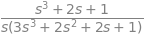

In [57]:
node2 = U_ic[v2].nsimplify().simplify().expand().together()
node2

The inverse Laplace was taking too long, so the lines of code were commented out

In [58]:
#node_2_voltage = inverse_laplace_transform(temp, s, t)
#node_2_voltage

Using NumPy

Extract the numerator and denominator and display.

In [59]:
n, d = fraction(node2)
n = n.expand()
Markdown('numerator: ${:s}$<br>denominator: ${:s}$'.format(latex(n),latex(d)))

numerator: $s^{3} + 2 s + 1$<br>denominator: $s \left(3 s^{3} + 2 s^{2} + 2 s + 1\right)$

Each of the numerator terms can be put over the common denominator.

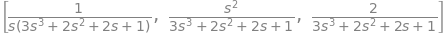

In [60]:
terms = [a / d for a in n.args]
display(terms)

The following code processes each of the terms obtained above. 

- ~~The time delay operator $e^{-ts}$ is removed from the xpression and the value of the time delay is saved in a list.~~
- use the SciPy [residue](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.residue.html) function to get the partial-fraction expansion residues and poles
- build the partial expansion terms and find the inverse Laplace of each one and save


Returns:

r: Residues corresponding to the poles. For repeated poles, the residues are ordered to correspond to ascending by power fractions.

p: Poles ordered by magnitude in ascending order.

k: Coefficients of the direct polynomial term.

Explain why ignoring k is OK


In [61]:
N = []

for p in terms:

    # use the SciPy residue function to get the partial-fraction expansion residues and poles
    n, d = fraction(p)
    cn = Poly(n, s).all_coeffs()
    cd = Poly(d, s).all_coeffs()
    r, p, k = signal.residue(cn, cd, tol=0.001, rtype='avg')

    # build a symbolic expression for each of the residues and find the inverse Laplace of each one and save
    z = 0
    for i in range(len(r)):
        m = (r[i]/(s-p[i]))
        z += inverse_laplace_transform(m, s, t)

    N.append(z)

The time delays associated with each term are:

The time domain version of each of the terms is displayed below.

Each of these terms came be converted to a function using SymPy's [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html) function.

Define the values for the x-axis of the plot and put each one into an array for plotting.

The arrays, out2a and out3a, do not have any delay so they can be summed and used to create the final array for plotting.

In [62]:
x = np.linspace(0, 50, 2000, endpoint=True)
V_node2 = np.zeros(len(x),dtype = complex)
for p in N:
    V_node2 += lambdify(t, p)(x)

The arrays, out0a and out1a, have a delay associated with them, so and offset in the time is included by shifting right by the corrrect amount. 

Plot the final combined result.

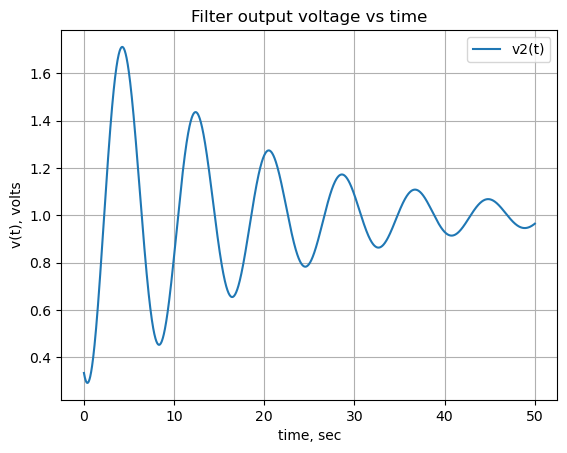

In [63]:
plt.title('Filter output voltage vs time')

plt.plot(x, np.real(V_node2),label='v2(t)')
#plt.plot(x, np.real(func_V1_t(x)),label='V1(t)')

plt.ylabel('v(t), volts')
plt.xlabel('time, sec')

plt.legend()
plt.grid()
plt.show()

## Node 3 voltage
The voltage on node 3 is symplified with the chain of operators applied to the expression; [nsimplify()](https://docs.sympy.org/latest/modules/simplify/simplify.html#sympy.simplify.simplify.nsimplify), [simplify()](https://docs.sympy.org/latest/modules/simplify/simplify.html#simplify), [expand()](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.expand) and [together()](https://docs.sympy.org/latest/modules/polys/reference.html#sympy.polys.rationaltools.together). This helps SymPy solve the inverse Laplace transform.

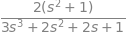

In [72]:
node3 = U_ic[v3].nsimplify().simplify().expand().together()
node3

The inverse Laplace was taking too long, so the lines of code were commented out

In [73]:
#node_2_voltage = inverse_laplace_transform(temp, s, t)
#node_2_voltage

Using NumPy

Extract the numerator and denominator and display.

In [75]:
n, d = fraction(node3)
n = n.expand()
Markdown('numerator: ${:s}$<br>denominator: ${:s}$'.format(latex(n),latex(d)))

numerator: $2 s^{2} + 2$<br>denominator: $3 s^{3} + 2 s^{2} + 2 s + 1$

Each of the numerator terms can be put over the common denominator.

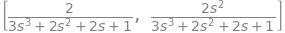

In [76]:
terms = [a / d for a in n.args]
display(terms)

The following code processes each of the terms obtained above. 

- ~~The time delay operator $e^{-ts}$ is removed from the xpression and the value of the time delay is saved in a list.~~
- use the SciPy [residue](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.residue.html) function to get the partial-fraction expansion residues and poles
- build the partial expansion terms and find the inverse Laplace of each one and save


Returns:

r: Residues corresponding to the poles. For repeated poles, the residues are ordered to correspond to ascending by power fractions.

p: Poles ordered by magnitude in ascending order.

k: Coefficients of the direct polynomial term.

Explain why ignoring k is OK


In [77]:
N = []

for p in terms:

    # use the SciPy residue function to get the partial-fraction expansion residues and poles
    n, d = fraction(p)
    cn = Poly(n, s).all_coeffs()
    cd = Poly(d, s).all_coeffs()
    r, p, k = signal.residue(cn, cd, tol=0.001, rtype='avg')

    # build a symbolic expression for each of the residues and find the inverse Laplace of each one and save
    z = 0
    for i in range(len(r)):
        m = (r[i]/(s-p[i]))
        z += inverse_laplace_transform(m, s, t)

    N.append(z)

The time delays associated with each term are:

The time domain version of each of the terms is displayed below.

Each of these terms came be converted to a function using SymPy's [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html) function.

Define the values for the x-axis of the plot and put each one into an array for plotting.

The arrays, out2a and out3a, do not have any delay so they can be summed and used to create the final array for plotting.

In [78]:
x = np.linspace(0, 50, 2000, endpoint=True)
V_node3 = np.zeros(len(x),dtype = complex)
for p in N:
    V_node3 += lambdify(t, p)(x)

The arrays, out0a and out1a, have a delay associated with them, so and offset in the time is included by shifting right by the corrrect amount. 

Plot the final combined result.

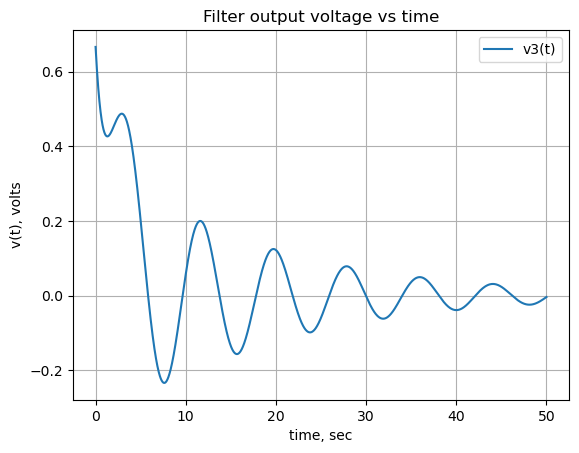

In [80]:
plt.title('Filter output voltage vs time')

plt.plot(x, np.real(V_node3),label='v3(t)')
#plt.plot(x, np.real(func_V1_t(x)),label='V1(t)')

plt.ylabel('v(t), volts')
plt.xlabel('time, sec')

plt.legend()
plt.grid()
plt.show()

## LTSpice

![Bridge SPICE](Bridge-T-LTSpice.png){#fig-bridge-spice} 

![Bridge SPICE plot](Bridge-T-LTSpice-plot.png){#fig-bridge-spice-plot} 

Load the csv file of node 10 voltage over the sweep range and plot along with the results obtained from SymPy.

In [81]:
fn = 'Bridge-T.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',',skip_header=1)

In [82]:
# initaliaze some empty arrays
time = np.zeros(len(LTSpice_data))
voltage1 = np.zeros(len(LTSpice_data))
voltage2 = np.zeros(len(LTSpice_data))
voltage3 = np.zeros(len(LTSpice_data))

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    time[i] = LTSpice_data[i][0]
    voltage1[i] = LTSpice_data[i][1]
    voltage2[i] = LTSpice_data[i][2]
    voltage3[i] = LTSpice_data[i][3]

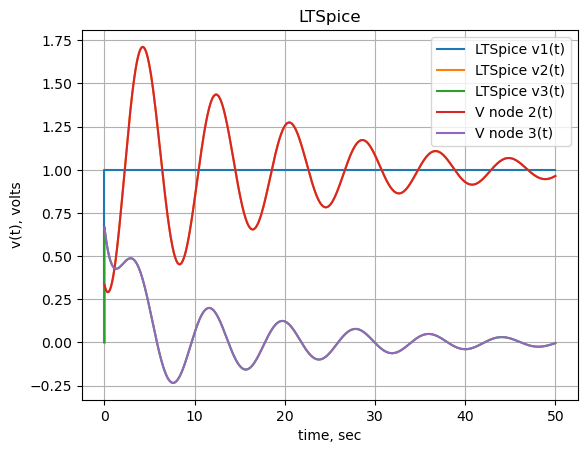

In [83]:
plt.title('LTSpice')

plt.plot(time, voltage1,label='LTSpice v1(t)')
plt.plot(time, voltage2,label='LTSpice v2(t)')
plt.plot(time, voltage3,label='LTSpice v3(t)')

plt.plot(x, np.real(V_node2),label='V node 2(t)')
plt.plot(x, np.real(V_node3),label='V node 3(t)')
#plt.plot(x, np.real(func_V1_t(x)),label='V1(t)')

plt.ylabel('v(t), volts')
plt.xlabel('time, sec')

plt.legend()
plt.grid()
plt.show()

the curves superimpose

## Summary
In this notebook, newtork equations were solved which had initial conditions, which were included in the network equations with their Laplace equilivents.   
